# Сборный Проект - исследование данных интернет-магазина «Стримчик».

### Описание проекта:

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года. Данные за 2016 год могут быть неполными.

### План исследования:
1. Загрузка данных и изучение общей информации.
2. Предобработка данных и расчеты.
3. Исследовательский анализ данных.
4. Формирование портрета пользователя каждого региона.
5. Проверка гипотез.
6. Итоговый вывод.

### Загрузка данных и изучение общей информации

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns 
import math
from IPython.display import display

In [2]:
data = pd.read_csv('/data/games.csv', sep=',')
display(data.head(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


#### Описание данных
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


Данные за 2016 год могут быть неполными.

#### Посмотрим информацию по data, проверим на соответствие хорошему стилю, типы данных, наличие пропусков и аномалий:

In [3]:
display(data.info())
display(data.describe())
display(data.isna().sum())
display(data.isna().mean()*100) 
print('Всего явных дубликатов:', data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Name                0.011965
Platform            0.000000
Year_of_Release     1.609333
Genre               0.011965
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64

Всего явных дубликатов: 0


#### Вывод: 
1. Все наименования столбцов - с нарушениями хорошего стиля, нужно привести к нижнему регистру.
2. Всего в датафрейме 16715 строк.
3. Пропуски присутствуют в столбцах:
  - Name - менее 1% пропущеных значений
  - Year_of_Release - 1.6% попущеных значений
  - Genre - менее 1% пропущеных значений
  - Critic_Score - 51.3% пропущеных значений
  - User_Score  - 54.6% пропущеных значений
  - Rating - 40% пропущеных значений
4. Некорректный тип данных:
  - Year_of_Release	- float64 - нужно заменить на int (т к у нас только год релиза, тип int)
  - User_Score - object - нужно заменить на float64
5. Аномальные значения не обнаружены
6. Явные дубликаты не обнаружены
  

### Предобработка данных

#### Приведем все столбцы к нижнему регистру:

Так как у нас только один вид ошибки хорошего стиля - нужно привести все к нижнему регистру - можно применить lower() ко всем колонкам

In [4]:
data = data.rename(columns=str.lower)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Проверим на явные дубликаты:

In [5]:
data[data[['name', 'platform', 'year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


Выявлен дубликат, т к вторая запись не содержить большей части информации - можем его удалить по индексу

In [6]:
data=data.drop(index=[16228])
data=data.reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16714 entries, 0 to 16713
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16714 non-null  object 
 2   year_of_release  16445 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16714 non-null  float64
 5   eu_sales         16714 non-null  float64
 6   jp_sales         16714 non-null  float64
 7   other_sales      16714 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Обработаем пропуски и заменим тип данных где потребуется:

 ##### Колонка "year_of_release" - 1,6%  пропусков
 Это всего 1.6% от всех данных, предполагаю что некоторые игры выходят на разных платформах в один год, и поэтому могли пропустить заполнение, проверим это предположение и если подтвердим - можно будет заполнить по годам выхода на других платформах.
 
 Посмотрим сколько всего игр и сколько игр в релизах на разных платформах:

In [7]:
print('Всего наименований игр за весь период: ', len(data['name'].unique()))
print('Релизы на платформах: ')
display(data['platform'].value_counts())

Всего наименований игр за весь период:  11559
Релизы на платформах: 


PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      519
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

In [8]:
display(data['name'].value_counts())
data['name'].sort_values().unique()

Need for Speed: Most Wanted                                       12
Madden NFL 07                                                      9
LEGO Marvel Super Heroes                                           9
Ratatouille                                                        9
FIFA 14                                                            9
                                                                  ..
Dragon Quest Swords: The Masked Queen and the Tower of Mirrors     1
Art of Fighting 3: The Path of the Warrior                         1
HotBrain                                                           1
AMNESIA World                                                      1
Shrek Extra Large                                                  1
Name: name, Length: 11558, dtype: int64

array([' Beyblade Burst', ' Fire Emblem Fates', " Frozen: Olaf's Quest",
       ..., 'wwe Smackdown vs. Raw 2006', '¡Shin Chan Flipa en colores!',
       nan], dtype=object)

Заметили пробелы в названиях некоторых игр, могло повлиять на отображение дубликатов, удалим пробелы и снова проверим

In [9]:
data['name']=data['name'].str.lstrip()

In [10]:
data['name'].sort_values().unique()

array(["'98 Koshien", '.hack//G.U. Vol.1//Rebirth',
       '.hack//G.U. Vol.2//Reminisce', ..., 'wwe Smackdown vs. Raw 2006',
       '¡Shin Chan Flipa en colores!', nan], dtype=object)

In [11]:
data.duplicated().sum()

0

Дубликаты не выявлены, но все равно правильно, что убрали пробелы

In [12]:
data.loc[data['name'] == "Need for Speed: Most Wanted"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Предположение не можем подтвердить, т к на разные платформы игры могут выходить в разные годы.
Значит заполним пропуски в тех случаях, где все игры выходили в один год - этим же значением через лямбда-функцию, остальные оставим без изменений. Для контроля возьмем игру LEGO Batman: The Videogame 

In [13]:
data.loc[data['name'] == "LEGO Batman: The Videogame"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
397,LEGO Batman: The Videogame,X360,2008.0,Action,2.04,1.02,0.0,0.32,76.0,7.9,E10+
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
460,LEGO Batman: The Videogame,DS,2008.0,Action,1.75,1.01,0.0,0.29,72.0,8,E10+
1519,LEGO Batman: The Videogame,PS3,2008.0,Action,0.72,0.39,0.0,0.19,75.0,7.7,E10+
1538,LEGO Batman: The Videogame,PSP,NaN,Action,0.57,0.44,0.0,0.27,73.0,7.4,E10+
1553,LEGO Batman: The Videogame,PS2,2008.0,Action,0.72,0.03,0.0,0.52,77.0,8.9,E10+
12465,LEGO Batman: The Videogame,PC,2008.0,Action,0.02,0.03,0.0,0.01,80.0,7.8,E10+


In [14]:
data ['year_of_release'] = data.groupby('name', group_keys=False)['year_of_release'].apply(
    lambda row: row.fillna(row.dropna().unique()[0] 
        if row.nunique()==1 
        else np.nan))

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16714 entries, 0 to 16713
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16714 non-null  object 
 2   year_of_release  16554 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16714 non-null  float64
 5   eu_sales         16714 non-null  float64
 6   jp_sales         16714 non-null  float64
 7   other_sales      16714 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [15]:
data.loc[data['name'] == "LEGO Batman: The Videogame"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
397,LEGO Batman: The Videogame,X360,2008.0,Action,2.04,1.02,0.0,0.32,76.0,7.9,E10+
456,LEGO Batman: The Videogame,Wii,2008.0,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
460,LEGO Batman: The Videogame,DS,2008.0,Action,1.75,1.01,0.0,0.29,72.0,8,E10+
1519,LEGO Batman: The Videogame,PS3,2008.0,Action,0.72,0.39,0.0,0.19,75.0,7.7,E10+
1538,LEGO Batman: The Videogame,PSP,2008.0,Action,0.57,0.44,0.0,0.27,73.0,7.4,E10+
1553,LEGO Batman: The Videogame,PS2,2008.0,Action,0.72,0.03,0.0,0.52,77.0,8.9,E10+
12465,LEGO Batman: The Videogame,PC,2008.0,Action,0.02,0.03,0.0,0.01,80.0,7.8,E10+


После замены осталось 160 пропусков, посмотрим на них

In [16]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
659,NaN,GEN,NaN,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16276,Homeworld Remastered Collection,PC,NaN,Strategy,0.00,0.01,0.00,0.00,86.0,8.2,E10+
16287,Shorts,DS,NaN,Platform,0.01,0.00,0.00,0.00,NaN,tbd,E10+
16347,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16457,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Эти данные будут полезны, оставим их, пропуски заполним 0 и поменям тип данных  на int

In [17]:
data ['year_of_release'] = data['year_of_release'].fillna(0).astype('int')

##### Колонка "name" и "genre" - менее 1% пропущенных значений
Посмотрим на эти строки

In [18]:
display(data[data['name'].isna()])
data[data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Значения пропущены по обоим колонкам в двух строчках, эти данные не имеют ценности для исследования, можно удалить и проверить

In [19]:
data.dropna(subset=['name'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16713
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16712 non-null  int64  
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


Проверим колонку 'genre' на неявные дубликаты:

In [20]:
data['genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

Неявные дубликаты не обнаружены

##### Колонка "user_score" - 54.6% пропущеных значений

In [21]:
print(data['user_score'].value_counts())
display(data[data['user_score'].isna()])

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.5       2
9.6       2
1.9       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16709,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16710,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16711,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16712,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Обнаружено значение tbd в 2424 колонках.
*TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований.*

Следовательно логично заменить это значение на NaN

In [22]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = 'NaN'
data['user_score'] = data['user_score'].astype(float)
print('Корреляция оценки критиков и оценки пользователей: {:.1%}'.format(data['critic_score'].corr(data['user_score'])))

Корреляция оценки критиков и оценки пользователей: 58.1%


Пропуски в данном столбце распределены по всему набору данных - нет связи с жанром, платформой или годом выпуска, поэтому вероятнее всего это не техническая ошибка выгрузки, данные скорее всего просто не заполнили, либо эти игры не оценивались, эти пропуски нельзя заполнить средним, медианой, модой, нулем - это рейтинг - данные сильно исказятся, также проверили корреляцию с оценкой критиков, 58% не достаточно чтобы заполнить пропуски опираясь на соотношение этих рейтингов.
Игры в принципе могли не оцениваться, а значит любое заполнение будет не корректно. Удалить эти данные нельзя, т к их слишком много и это точно исказит другие данные в исследовании. Поэтому оставим как есть.

##### Колонка "critic_score" -  51.3% пропущеных значений



In [23]:
print(data['critic_score'].value_counts())
print()
print('Все уникальные значения:', data['critic_score'].sort_values().unique())
display(data[data['critic_score'].isna()])


70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
29.0      3
13.0      1
22.0      1
17.0      1
21.0      1
Name: critic_score, Length: 82, dtype: int64

Все уникальные значения: [13. 17. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34.
 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52.
 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70.
 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88.
 89. 90. 91. 92. 93. 94. 95. 96. 97. 98. nan]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16709,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16710,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16711,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16712,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Пропуски в данном столбце распределены по всему набору данных - нет связи с жанром, платформой или годом выпуска, поэто вероятнее всего это не техническая ошибка выгрузки, данные скорее всего просто не заполнили, либо эти игры не оценивались, эти пропуски нельзя заполнить средним, медианой, модой, нулем - это рейтинг - данные сильно исказятся, также проверили корреляцию с оценкой пользователей ранее - 58% не достаточно чтобы заполнить пропуски опираясь на соотношение этих рейтингов.
Некоторые игры, в принципе, могли не оцениваться критиками, а значит любое заполнение будет не корректно. Удалить эти данные нельзя, т к их слишком много и это точно исказит другие данные в исследовании. Поэтому оставим как есть.

##### Колонка "rating" - 40% пропущеных значений

In [24]:
print(data['rating'].value_counts())
display(data[data['rating'].isna()])

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16709,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16710,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16711,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16712,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [25]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

**Расшифровка значений из колонки "rating"**

ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».*

взято из источника:
https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board

* «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры.

* «E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера.

* «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови.

* «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.

* «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику.

* «AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое.

* «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу

* «RP 17+» («Rating Pending») — «Рейтинг ожидается - примерно 17+»: Продукт отправлен ESRB на оценку, но примерное содержание близко к рейтингу «M».

Уточняем обозначение 'K-A' 

взято из источника:
https://psxplanet.ru/ESRB

* «K-A» («Kids to Adults»)— устаревшее обозначение «Для детей и взрослых»: Содержание игры вполне подходит для возрастной категории от 6 лет и старше. Такие игры подходят для всех возрастов. Они могут содержать минимальное насилие или немного грубый разговорный язык. Этот рейтинг был заменён на «Everyone» 1 января 1998 года и может встречаться только в играх, изданных ранее, кромеThe Simpsons Cartoon Studio. Первой игрой, получившей данный рейтинг, стала SimCity 2000 в 1993 году.

Для удобства исследования заменим значение «K-A» на «E», т к это одно и тоже, а также рассмотрим данные с рейтингом «RP»


In [26]:
data.loc[data['rating'] == 'K-A', 'rating'] = 'E'

In [27]:
data.query('rating == "RP"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
13672,Clockwork Empires,PC,0,Strategy,0.0,0.04,0.0,0.00,58.0,3.8,RP
14270,Supreme Ruler: Cold War,PC,2011,Strategy,0.0,0.03,0.0,0.01,63.0,6.8,RP
16180,WRC: FIA World Rally Championship,PC,2005,Racing,0.0,0.01,0.0,0.00,65.0,NaN,RP


Учитвая год издания этих игр - вероятно рейтинг не отпределен или просто не изменили данные когда рейтин был присвоен,
их немного - оставим как есть.

In [28]:
display(data.query('year_of_release == 2016 and rating != rating'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,NaN
1216,Ratchet & Clank (2016),PS4,2016,Platform,0.50,0.76,0.04,0.24,NaN,NaN,NaN
1275,Doom (2016),PS4,2016,Shooter,0.54,0.69,0.02,0.24,NaN,NaN,NaN
1466,Yokai Watch 3,3DS,2016,Action,0.00,0.00,1.33,0.00,NaN,NaN,NaN
1475,The Elder Scrolls V: Skyrim,PS4,2016,Role-Playing,0.48,0.59,0.04,0.21,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16698,The Longest 5 Minutes,PSV,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16702,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN


In [29]:
data.loc[data['name'] == "The Elder Scrolls V: Skyrim"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
75,The Elder Scrolls V: Skyrim,X360,2011,Role-Playing,5.05,2.79,0.10,0.85,96.0,8.4,M
130,The Elder Scrolls V: Skyrim,PS3,2011,Role-Playing,2.55,2.60,0.25,1.00,92.0,6.4,M
313,The Elder Scrolls V: Skyrim,PC,2011,Role-Playing,1.16,2.12,0.00,0.60,94.0,8.1,M
1475,The Elder Scrolls V: Skyrim,PS4,2016,Role-Playing,0.48,0.59,0.04,0.21,NaN,NaN,NaN
2768,The Elder Scrolls V: Skyrim,XOne,2016,Role-Playing,0.41,0.27,0.00,0.07,NaN,NaN,NaN


Игры за 2016 год без рейтинга это странно, скорее всего здесь или ошибка выгрузки (данные по оценкам пользователей и критиков тоже отсутствуют), или данные пока не заносили - в документации к проекту нас предупредили что за 2016 г данные могут быть не полными. Поставим заглушку на все пропуски в данной колонке

In [30]:
data ['rating'] = data['rating'].fillna('No_ESRB')
print(data['rating'].value_counts())
display(data[data['rating'].isna()])

No_ESRB    6763
E          3993
T          2961
M          1563
E10+       1420
EC            8
RP            3
AO            1
Name: rating, dtype: int64


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


#### Создадим колонку с общей суммой выручки по всем регионам:

In [31]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [32]:
display(data.query('total_sales== 0.00'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16675,G1 Jockey 4 2008,PS3,2008,Sports,0.0,0.0,0.0,0.0,NaN,NaN,No_ESRB,0.0
16708,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.0,0.0,0.0,0.0,NaN,NaN,No_ESRB,0.0


Удалим эти строки, т к они не содержат полезной информации и обновим индексы

In [33]:
data=data.drop(index=[16676])
data=data.drop(index=[16709])
data=data.reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16710 entries, 0 to 16709
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16710 non-null  object 
 1   platform         16710 non-null  object 
 2   year_of_release  16710 non-null  int64  
 3   genre            16710 non-null  object 
 4   na_sales         16710 non-null  float64
 5   eu_sales         16710 non-null  float64
 6   jp_sales         16710 non-null  float64
 7   other_sales      16710 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16710 non-null  object 
 11  total_sales      16710 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


#### Вывод:
- В датафрейме удалили 4 строки (менее 1% данных) - пропуски в столбцах 'name' 'genre' и данные с 0 значениями выручки и пропусками в колонках с рейтингами.
- Пропуски в колонке 'year_of_release' часть востановили по существующим данным, 160 пропусков заполнили "0" - так мы их индентифицируем при исследовании.
- В колонках 'user_score', 'critic_score','rating' пропуски не удаляли и не заполняли т к это некорректно повлияло бы на исследование.
- Было обнаружено значение tbd в 2424 колонках - заменили на NaN.(от англ. To Be Determined (будет определено) или To Be Decided (будет решено)) 
- Аномалии, явные и неявные дубликаты не были обнаружены.
- Добавили колонку с общей суммой выручки по всем регионам
- Всего готово к исследованию 16711 строк.

### Исследовательский анализ данных

Посмотрим основную статистику:

In [34]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,8137.000000,7590.000000,16710.000000
mean,1987.518492,0.263349,0.145071,0.077637,0.047351,68.967679,7.125046,0.533409
std,194.277919,0.813630,0.503400,0.308897,0.186757,13.938165,1.500006,1.548406
min,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


#### Распределение количества игр по годам релиза, с 1980-2016 гг
Посмотрим сколько игр выпускалось в разные годы:

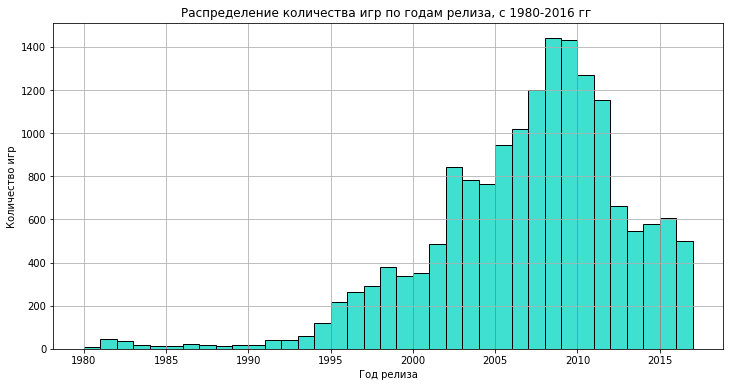

In [35]:
data['year_of_release'].hist(bins=37, range=(1980,2017), edgecolor='black', figsize=(12,6), color='turquoise')
plt.title("Распределение количества игр по годам релиза, с 1980-2016 гг ")
plt.xlabel("Год релиза")
plt.ylabel("Количество игр")
plt.show() 

Больше всего игр было выпущено в 2008  
Стабильный рост количества игр с 1993 г. пик- 2008, затем с 2012 ощутимый спад - связано с активным ростом игр в соц сетях и в формате мобильного приложения(данный период - период большого скачка в разработки мобильных игр).
Для исследования возьмем период с 2013 - данные будут релевантны для прогнозирования на 2017 г. 

#### Распределение продаж игр по платформам


Сначала построим график распределения данных по продажам игр по платформам в порядке убывания за весь период 1980-2016гг и выведем для наглядности сводную таблицу с отсортированными по убыванию данными о продажах по всем платформам:

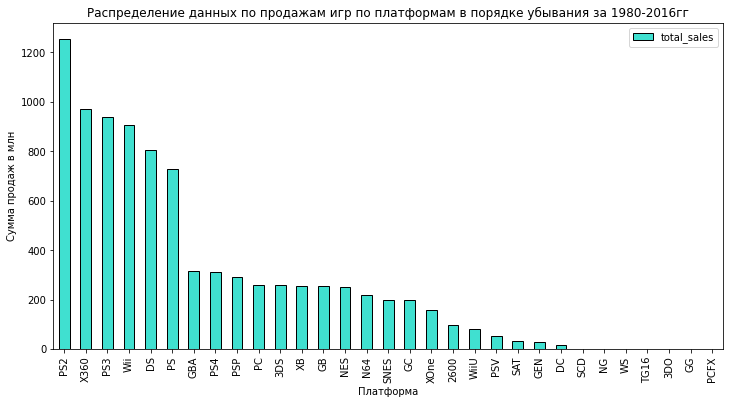

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.64
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


In [36]:
(
    data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .plot(kind="bar", edgecolor='black', figsize=(12,6), color='turquoise')
)
plt.title("Распределение данных по продажам игр по платформам в порядке убывания за 1980-2016гг")
plt.xlabel("Платформа")
plt.ylabel("Сумма продаж в млн")
plt.show() 

data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

Для начала возьмем период с "запасом" чтобы определить период активных продаж в периоде жизни платформ

In [37]:
data_relevance = data[data['year_of_release'] > 2009].reset_index(drop=True)

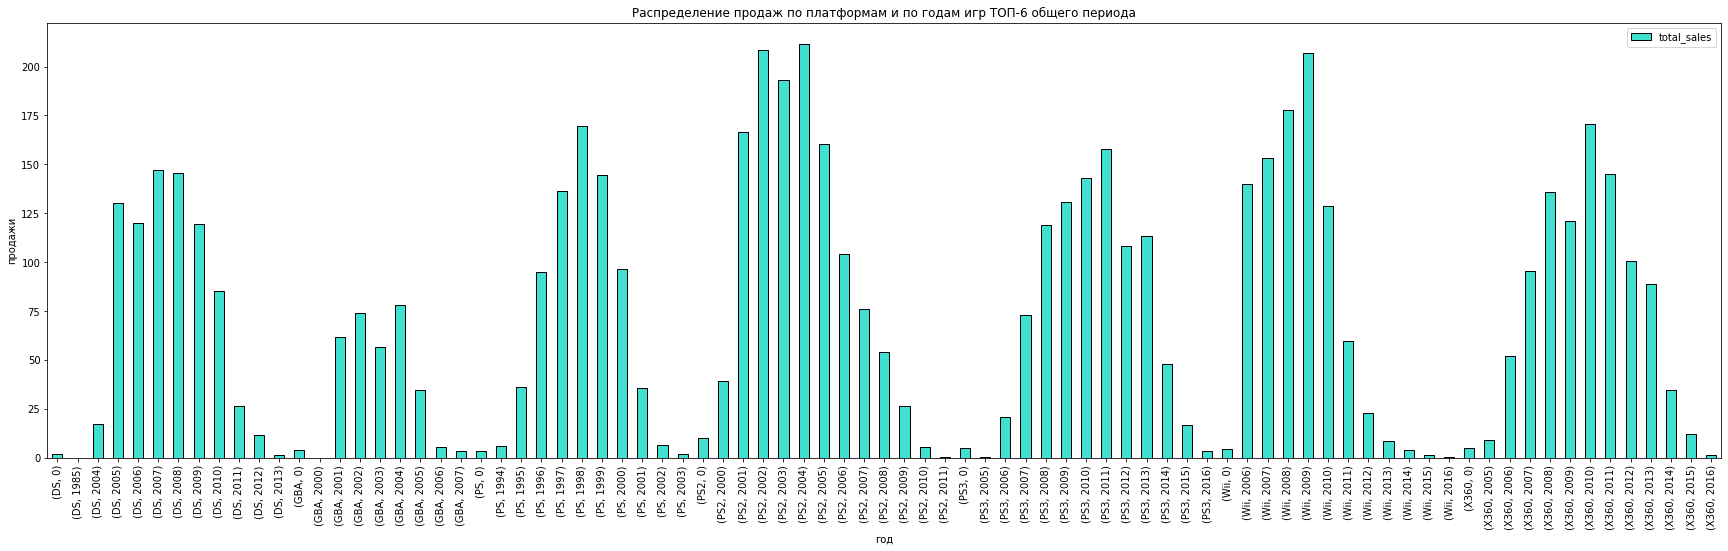

In [38]:
(
    data.pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')
    .query('platform in ["PS3", "PS", "X360", "PS2", "Wii", "DS","GBA"]')
    .plot(kind='bar', edgecolor='black', figsize=(30,8), color='turquoise')
)
plt.title("Распределение продаж по платформам и по годам игр ТОП-6 общего периода")
plt.xlabel("год")
plt.ylabel("продажи")
plt.show()


На графике видна динамика продаж периода "жизни" игровых платформ ТОП-7, GBA захватили в график для наглядности - выручка в 2 раза ниже чем у 6ой позиции ТОПа. Период актуальности платформы составляет в среднем 5-7 лет. Релевантные данные для прогноза 2-3 года. В 2016г данные не полные, но необходимые и самые свежие - определим актульный период для исследования 2014-2016 гг

Посмотрим как изменится распределение продаж по платформам с актуализацией на нужный нам период - 2014-2016гг. Создадим новый датафрейм с обновлением индексов

In [39]:
data_relevance = data[(data['year_of_release'] > 2013) & (data['year_of_release'] < 2017)].reset_index(drop=True)


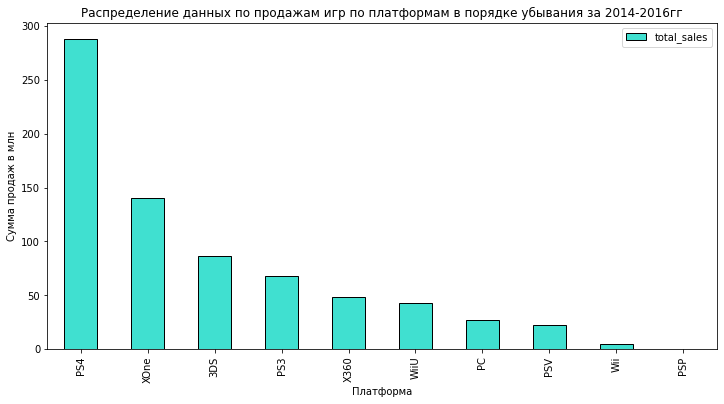

In [40]:
(
    data_relevance.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .plot(kind="bar", edgecolor='black', figsize=(12,6), color='turquoise')
)
plt.title("Распределение данных по продажам игр по платформам в порядке убывания за 2014-2016гг")
plt.xlabel("Платформа")
plt.ylabel("Сумма продаж в млн")
plt.show() 

In [41]:
print(data_relevance.info())
display(data_relevance.isna().sum())
display(data_relevance.isna().mean()*100) 
data_relevance.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1686 non-null   object 
 1   platform         1686 non-null   object 
 2   year_of_release  1686 non-null   int64  
 3   genre            1686 non-null   object 
 4   na_sales         1686 non-null   float64
 5   eu_sales         1686 non-null   float64
 6   jp_sales         1686 non-null   float64
 7   other_sales      1686 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           1686 non-null   object 
 11  total_sales      1686 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 158.2+ KB
None


name                 0
platform             0
year_of_release      0
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score       968
user_score         798
rating               0
total_sales          0
dtype: int64

name                0.000000
platform            0.000000
year_of_release     0.000000
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       57.413998
user_score         47.330961
rating              0.000000
total_sales         0.000000
dtype: float64

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,718.000000,888.000000,1686.000000
mean,2014.952550,0.168482,0.160540,0.055202,0.048410,72.306407,6.623536,0.432633
std,0.799185,0.446474,0.467214,0.211691,0.141902,12.213500,1.589792,1.056899
min,2014.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.200000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,66.000000,5.800000,0.030000
50%,2015.000000,0.020000,0.020000,0.010000,0.010000,74.000000,7.000000,0.100000
75%,2016.000000,0.120000,0.120000,0.040000,0.040000,81.000000,7.800000,0.350000
max,2016.000000,6.030000,6.310000,3.180000,2.380000,97.000000,9.300000,14.630000


#### К дальнейшему исследованию данные готовы:
- период с 2014-2016г  
- 1686 строки 
- пропуски в critic_score - 57% 
- user_score - 47% 


#### Выявим потенциально прибыльные платформы

Сгруппируем данные по платформам и посмотрим основную статистику:

In [42]:
data_relevance.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,210.0,0.412667,1.193397,0.01,0.0400,0.090,0.2500,11.68
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
PS3,218.0,0.312706,0.634185,0.01,0.0400,0.110,0.3275,5.27
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
PSP,13.0,0.027692,0.027735,0.01,0.0100,0.020,0.0200,0.09
PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
Wii,11.0,0.460909,0.625451,0.01,0.0350,0.180,0.7550,2.01
WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28


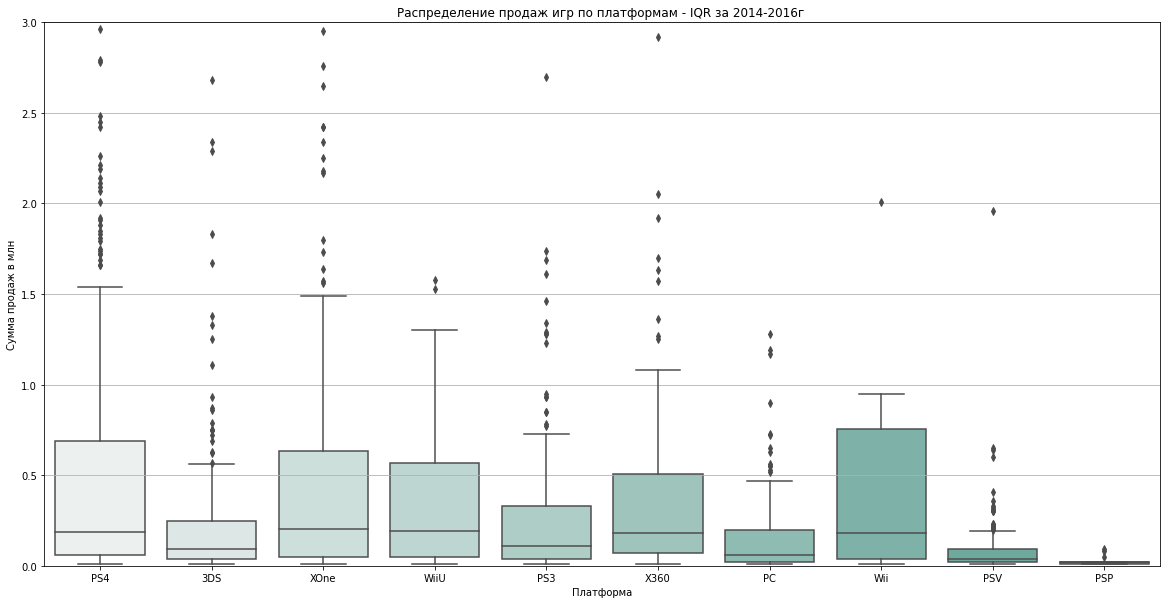

In [43]:
plt.figure(figsize=(20, 10))
plt.ylim(0, 3)
plt.grid(True)
sns.boxplot(x='platform', y='total_sales', data=data_relevance, palette='light:#5A9')
plt.title("Распределение продаж игр по платформам - IQR за 2014-2016г ")
plt.xlabel("Платформа")
plt.ylabel("Сумма продаж в млн")
plt.show()


За период с 2014-2016гг по платформам показатель IQR разный, показатели среднего и медианы тоже значительно отличаются, наибольшие показатели у Wii, XOne, PS4, хорошие у X360, WiiU и PS3; наименьшие - у PSP, PSV. 

Сформируем график и посмотрим какие платформы лидируют по продажам, растут или падают

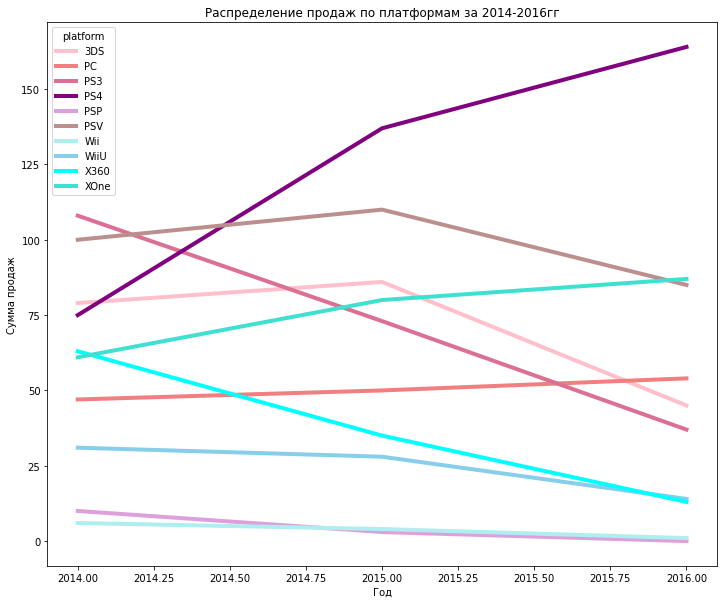

In [44]:
colors = ['pink',  'lightcoral', 'palevioletred','purple', 'plum', 'rosybrown',  'paleturquoise',  'skyblue', 'aqua','turquoise',  'teal', 'aquamarine']
(
    data_relevance.pivot_table(index='year_of_release', values='total_sales', columns='platform', aggfunc=len, fill_value=0)
    .plot(legend=True, figsize = (12,10), fontsize=10, color=colors,  linewidth=4)
)
plt.title("Распределение продаж по платформам за 2014-2016гг")
plt.ylabel('Сумма продаж')
plt.xlabel('Год')
plt.show()

1. Активно растут по продажам: PS4, XOne
2. Падают по продажам: PS3, 3DS, X360, Wii, DS, PSP, WiiU
3. Стабильны: PC

Наиболее прибыльные платформы вероятно - PS4, XOne

#### Соотношение продаж по платформам с оценками пользователей и критиков


##### Рассмотрим как влияют отзывы пользователей и критиков на продажи на основе данных по платформе XOne

In [45]:
data_relevance_XOne = data_relevance.query('platform == "XOne"')[['user_score', 'critic_score', 'total_sales']]
display(data_relevance_XOne.head(10))
data_relevance_XOne.corr()

,user_score,critic_score,total_sales
8,NaN,NaN,7.39
14,7.9,97.0,5.47
16,5.4,81.0,5.26
21,6.4,84.0,4.49
28,6.2,88.0,4.22
38,NaN,NaN,3.66
39,4.1,72.0,3.50
42,5.5,75.0,3.37
45,7.5,82.0,3.28
46,4.4,84.0,3.25


,user_score,critic_score,total_sales
user_score,1.000000,0.440977,-0.070384
critic_score,0.440977,1.000000,0.428677
total_sales,-0.070384,0.428677,1.000000


построим диаграммы рассеивания для корреляции общих продаж с оценками пользователей и критиков

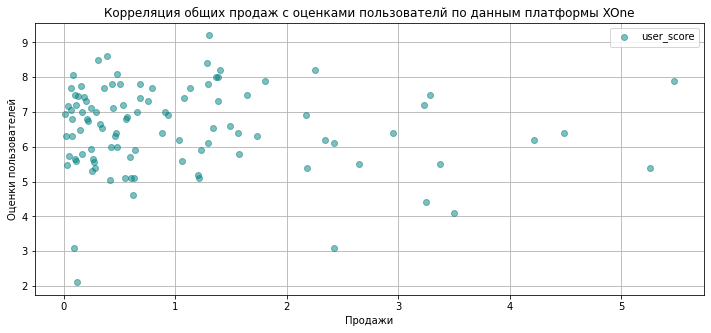

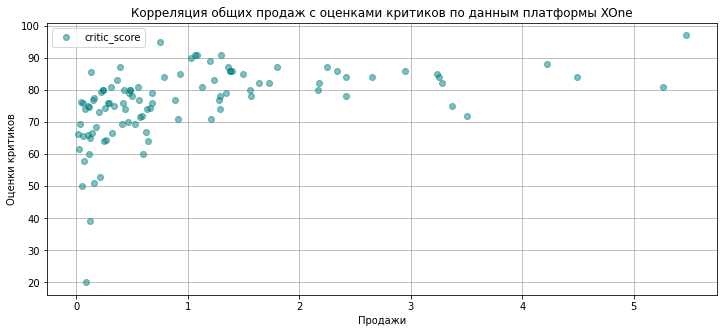

Корреляция общих продаж с оценками пользователй по данным платформы XOne: -7.0%


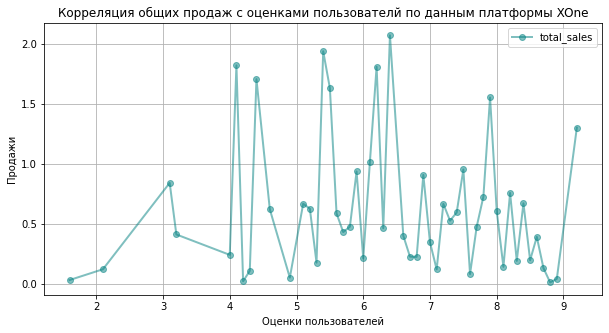

Корреляция общих продаж с оценками пользователй по данным платформы XOne: 42.9%


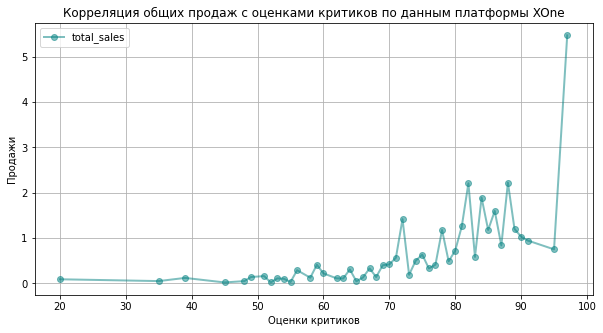

In [46]:
(
    data_relevance_XOne.pivot_table(index='total_sales', values='user_score')
    .plot(grid=True, style='o', figsize=(12, 5), color='teal',  alpha=0.5)
)
plt.title("Корреляция общих продаж с оценками пользователй по данным платформы XOne")
plt.ylabel("Оценки пользователей")
plt.xlabel("Продажи")
plt.show()

(
    data_relevance_XOne.pivot_table(index='total_sales', values='critic_score')
    .plot(grid=True, style='o', figsize=(12, 5), color='teal',  alpha=0.5)
)
plt.title("Корреляция общих продаж с оценками критиков по данным платформы XOne")
plt.ylabel("Оценки критиков")
plt.xlabel("Продажи")
plt.show()



print('Корреляция общих продаж с оценками пользователй по данным платформы XOne: {:.1%}'.format(data_relevance_XOne['total_sales'].corr(data_relevance_XOne['user_score'])))
(
    data_relevance_XOne.pivot_table(index='user_score', values='total_sales')
    .plot(grid=True, 
          style='-o', 
          figsize=(10, 5), 
          color='teal', 
          linewidth=2,
          alpha=0.5,
          legend=True)
)
plt.title("Корреляция общих продаж с оценками пользователй по данным платформы XOne")
plt.ylabel("Продажи")
plt.xlabel("Оценки пользователей")
plt.show()

print('Корреляция общих продаж с оценками пользователй по данным платформы XOne: {:.1%}'
      .format(data_relevance_XOne['total_sales'].corr(data_relevance_XOne['critic_score'])))
(
    data_relevance_XOne.pivot_table(index='critic_score', values='total_sales')
    .plot(grid=True, 
          style='-o', 
          figsize=(10, 5), 
          color='teal', 
          linewidth=2,
          alpha=0.5,
          legend=True)
)
plt.title("Корреляция общих продаж с оценками критиков по данным платформы XOne")
plt.ylabel("Продажи")
plt.xlabel("Оценки критиков")
plt.show()

Зависимость между оценками пользователей и продажами отрицательная.
Зависимость между оценками критиков и продажами присутствует - корреляция почти 43%, но нельзя сказать что оценка критиков в решающем ключе влияет на продажи

Построим диаграммы рассеивания для корреляции общих продаж с оценками пользователей и критиков для других платформ

,user_score,critic_score,total_sales
user_score,1.000000,0.546434,-0.040132
critic_score,0.546434,1.000000,0.402661
total_sales,-0.040132,0.402661,1.000000


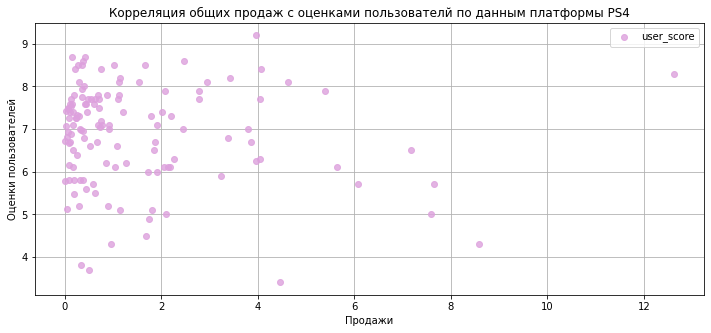

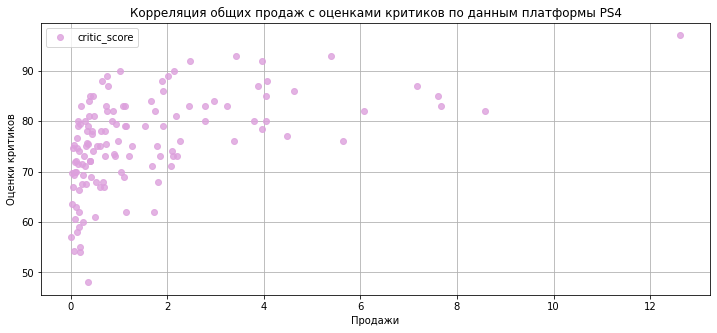

In [47]:
data_relevance_PS4 = data_relevance.query('platform == "PS4"')[['user_score', 'critic_score', 'total_sales']]
display(data_relevance_PS4.corr())
(
    data_relevance_PS4.pivot_table(index='total_sales', values='user_score')
    .plot(grid=True, style='o', figsize=(12, 5), color='plum',  alpha=0.8)
)
plt.title("Корреляция общих продаж с оценками пользователй по данным платформы PS4")
plt.ylabel("Оценки пользователей")
plt.xlabel("Продажи")
plt.show()

(
    data_relevance_PS4.pivot_table(index='total_sales', values='critic_score')
    .plot(grid=True, style='o', figsize=(12, 5), color='plum',  alpha=0.8)
)
plt.title("Корреляция общих продаж с оценками критиков по данным платформы PS4")
plt.ylabel("Оценки критиков")
plt.xlabel("Продажи")
plt.show()


,user_score,critic_score,total_sales
user_score,1.000000,0.693445,-0.166761
critic_score,0.693445,1.000000,0.446575
total_sales,-0.166761,0.446575,1.000000


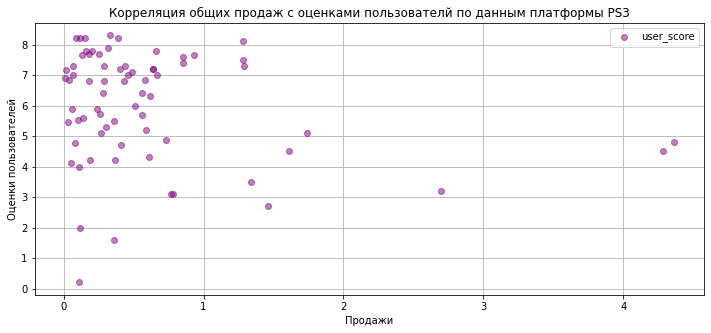

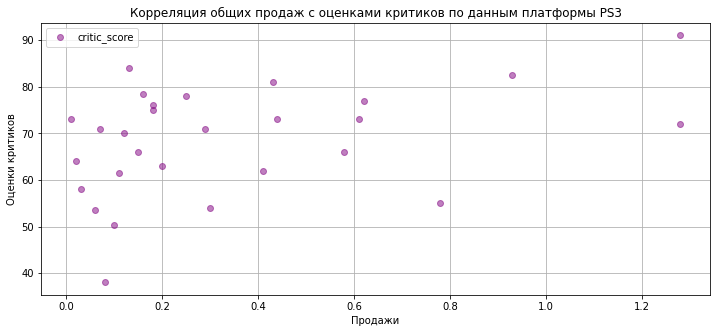

In [48]:
data_relevance_PS3 = data_relevance.query('platform == "PS3"')[['user_score', 'critic_score', 'total_sales']]
display(data_relevance_PS3.corr())
(
    data_relevance_PS3.pivot_table(index='total_sales', values='user_score')
    .plot(grid=True, style='o', figsize=(12, 5), color='purple',  alpha=0.5)
)
plt.title("Корреляция общих продаж с оценками пользователй по данным платформы PS3")
plt.ylabel("Оценки пользователей")
plt.xlabel("Продажи")
plt.show()

(
    data_relevance_PS3.pivot_table(index='total_sales', values='critic_score')
    .plot(grid=True, style='o', figsize=(12, 5), color='purple',  alpha=0.5)
)
plt.title("Корреляция общих продаж с оценками критиков по данным платформы PS3")
plt.ylabel("Оценки критиков")
plt.xlabel("Продажи")
plt.show()

,user_score,critic_score,total_sales
user_score,1.000000,0.625309,-0.138445
critic_score,0.625309,1.000000,0.525723
total_sales,-0.138445,0.525723,1.000000


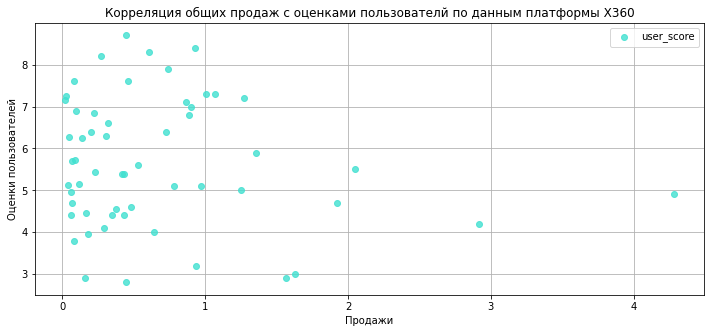

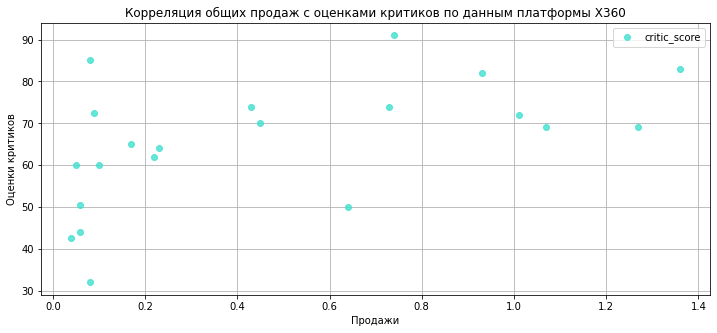

In [49]:
data_relevance_X360 = data_relevance.query('platform == "X360"')[['user_score', 'critic_score', 'total_sales']]
display(data_relevance_X360.corr())
(
    data_relevance_X360.pivot_table(index='total_sales', values='user_score')
    .plot(grid=True, style='o', figsize=(12, 5), color='turquoise',  alpha=0.8)
)
plt.title("Корреляция общих продаж с оценками пользователй по данным платформы X360")
plt.ylabel("Оценки пользователей")
plt.xlabel("Продажи")
plt.show()

(
    data_relevance_X360.pivot_table(index='total_sales', values='critic_score')
    .plot(grid=True, style='o', figsize=(12, 5), color='turquoise',  alpha=0.8)
)
plt.title("Корреляция общих продаж с оценками критиков по данным платформы X360")
plt.ylabel("Оценки критиков")
plt.xlabel("Продажи")
plt.show()

,user_score,critic_score,total_sales
user_score,1.000000,0.466099,-0.071597
critic_score,0.466099,1.000000,0.174634
total_sales,-0.071597,0.174634,1.000000


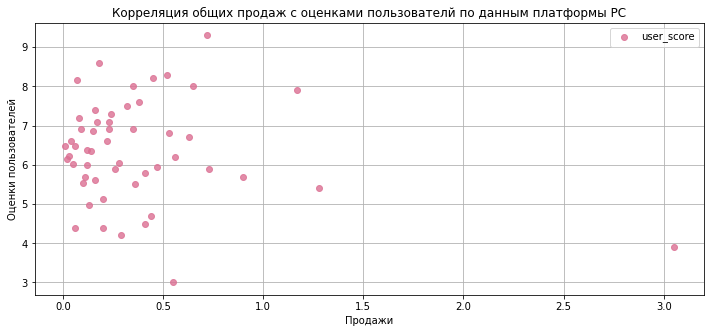

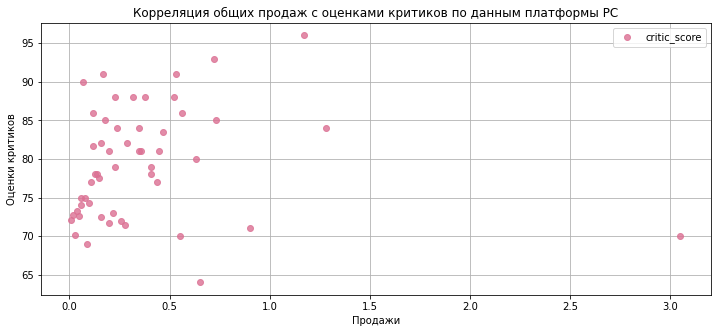

In [50]:
data_relevance_PC = data_relevance.query('platform == "PC"')[['user_score', 'critic_score', 'total_sales']]
display(data_relevance_PC.corr())
(
    data_relevance_PC.pivot_table(index='total_sales', values='user_score')
    .plot(grid=True, style='o', figsize=(12, 5), color='palevioletred',  alpha=0.8)
)
plt.title("Корреляция общих продаж с оценками пользователй по данным платформы PC")
plt.ylabel("Оценки пользователей")
plt.xlabel("Продажи")
plt.show()

(
    data_relevance_PC.pivot_table(index='total_sales', values='critic_score')
    .plot(grid=True, style='o', figsize=(12, 5), color='palevioletred',  alpha=0.8)
)
plt.title("Корреляция общих продаж с оценками критиков по данным платформы PC")
plt.ylabel("Оценки критиков")
plt.xlabel("Продажи")
plt.show()

,user_score,critic_score,total_sales
user_score,1.000000,0.862485,0.215193
critic_score,0.862485,1.000000,0.314117
total_sales,0.215193,0.314117,1.000000


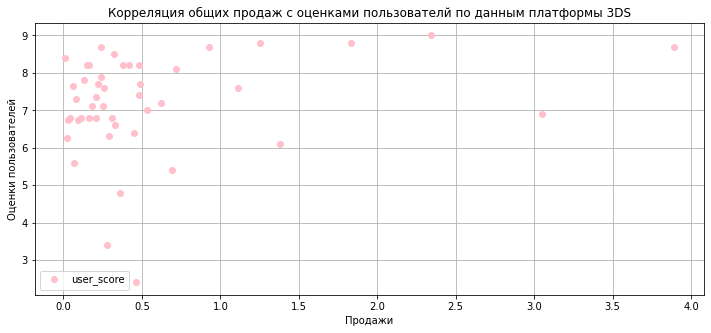

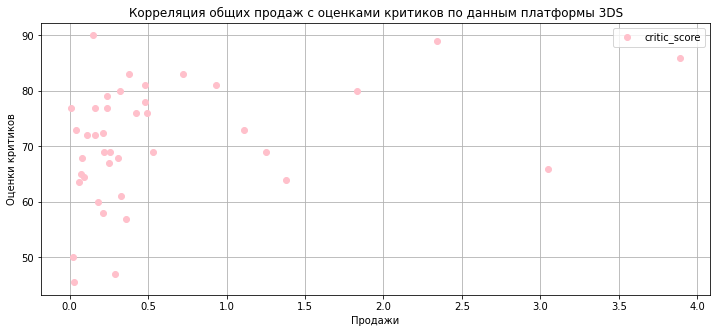

In [51]:
data_relevance_3DS = data_relevance.query('platform == "3DS"')[['user_score', 'critic_score', 'total_sales']]
display(data_relevance_3DS.corr())
(
    data_relevance_3DS.pivot_table(index='total_sales', values='user_score')
    .plot(grid=True, style='o', figsize=(12, 5), color='pink',  alpha=1)
)
plt.title("Корреляция общих продаж с оценками пользователй по данным платформы 3DS")
plt.ylabel("Оценки пользователей")
plt.xlabel("Продажи")
plt.show()

(
    data_relevance_3DS.pivot_table(index='total_sales', values='critic_score')
    .plot(grid=True, style='o', figsize=(12, 5), color='pink',  alpha=1)
)
plt.title("Корреляция общих продаж с оценками критиков по данным платформы 3DS")
plt.ylabel("Оценки критиков")
plt.xlabel("Продажи")
plt.show()

Сравнили корреляцию на платформах XOne, PS4, PS3, X360, PC, 3DS. Зависимость между оценками пользователей и продажами не выявлена, в большинстве случаев корреляция отрицательная Зависимость между оценками критиков и продажами местами присутствует - корреляция почти 52% на платформе X360, на других платформах показатель ниже 44-17%. Опираться на отзывы пользователей и критиков для прогнозирования не рекомендуется.

#### Распределение игр по жанрам 
Посмотрим на общее распределение игр по жанрам. Выявим самые прибыльные жанры.

In [52]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

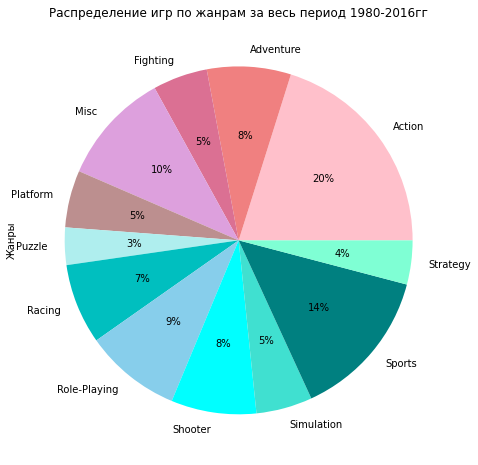

In [53]:
colors = ['pink',  'lightcoral', 'palevioletred', 'plum', 'rosybrown',  'paleturquoise', 'c', 'skyblue', 'aqua','turquoise',  'teal', 'aquamarine']
data.groupby(['genre']).count().plot(
    kind='pie', y='name', autopct='%1.0f%%', colors=colors, legend=False, figsize = (8,8))

plt.title("Распределение игр по жанрам за весь период 1980-2016гг")
plt.ylabel('Жанры')
plt.show()

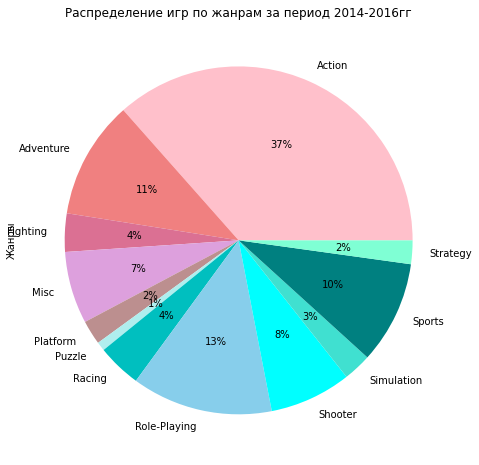

In [54]:
colors = ['pink',  'lightcoral', 'palevioletred', 'plum', 'rosybrown',  'paleturquoise', 'c', 'skyblue', 'aqua','turquoise',  'teal', 'aquamarine']
data_relevance.groupby(['genre']).count().plot(
    kind='pie', y='name', autopct='%1.0f%%', colors=colors, legend=False, figsize = (8,8))

plt.title("Распределение игр по жанрам за период 2014-2016гг")
plt.ylabel('Жанры')
plt.show()

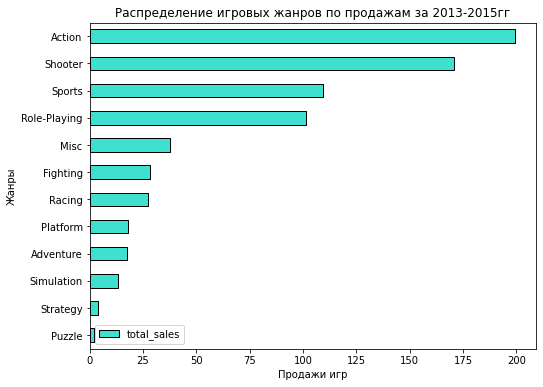

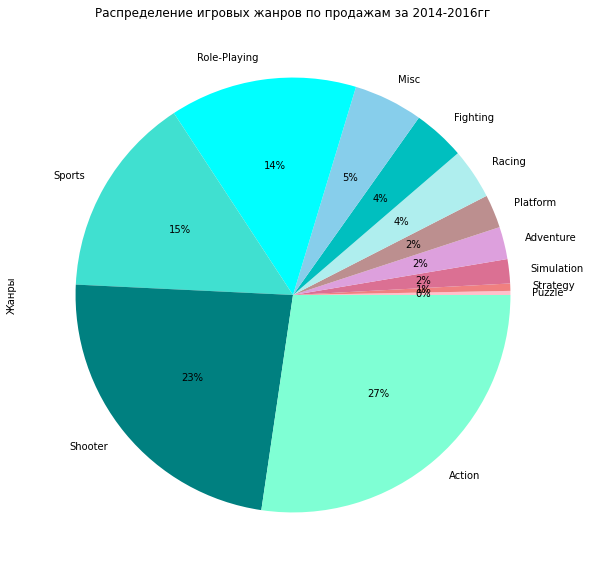

In [55]:
(data_relevance
  .pivot_table(index='genre', values='total_sales', aggfunc='sum')
  .sort_values(by='total_sales', ascending=True)
  .plot.barh(edgecolor='black', color='turquoise', grid=False, figsize = (8,6))
)

plt.title("Распределение игровых жанров по продажам за 2013-2015гг")
plt.ylabel('Жанры')
plt.xlabel('Продажи игр')
plt.show()

colors = ['pink',  'lightcoral', 'palevioletred', 'plum', 'rosybrown',  'paleturquoise', 'c', 'skyblue', 'aqua','turquoise',  'teal', 'aquamarine']
(data_relevance
  .pivot_table(index='genre', values='total_sales', aggfunc='sum')
  .sort_values(by='total_sales', ascending=True)
  .plot(kind='pie', y='total_sales', autopct='%1.0f%%', colors=colors, legend=False, figsize = (10,10) )
)
plt.title("Распределение игровых жанров по продажам за 2014-2016гг")
plt.ylabel('Жанры')
plt.show()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,616.0,0.323588,0.799827,0.01,0.0300,0.090,0.2800,12.62
Adventure,185.0,0.094865,0.203147,0.01,0.0200,0.030,0.0800,1.66
Fighting,60.0,0.470333,1.188053,0.01,0.0600,0.125,0.3200,7.55
Misc,113.0,0.332301,0.736999,0.01,0.0300,0.090,0.3200,5.27
Platform,38.0,0.476053,0.722561,0.01,0.0625,0.140,0.4675,3.21
Puzzle,14.0,0.157857,0.320629,0.01,0.0200,0.045,0.1000,1.19
Racing,69.0,0.398841,0.963716,0.01,0.0300,0.090,0.2500,7.09
Role-Playing,221.0,0.459005,1.177284,0.01,0.0500,0.110,0.3600,11.68
Shooter,128.0,1.335469,2.050567,0.01,0.1725,0.515,1.6175,14.63


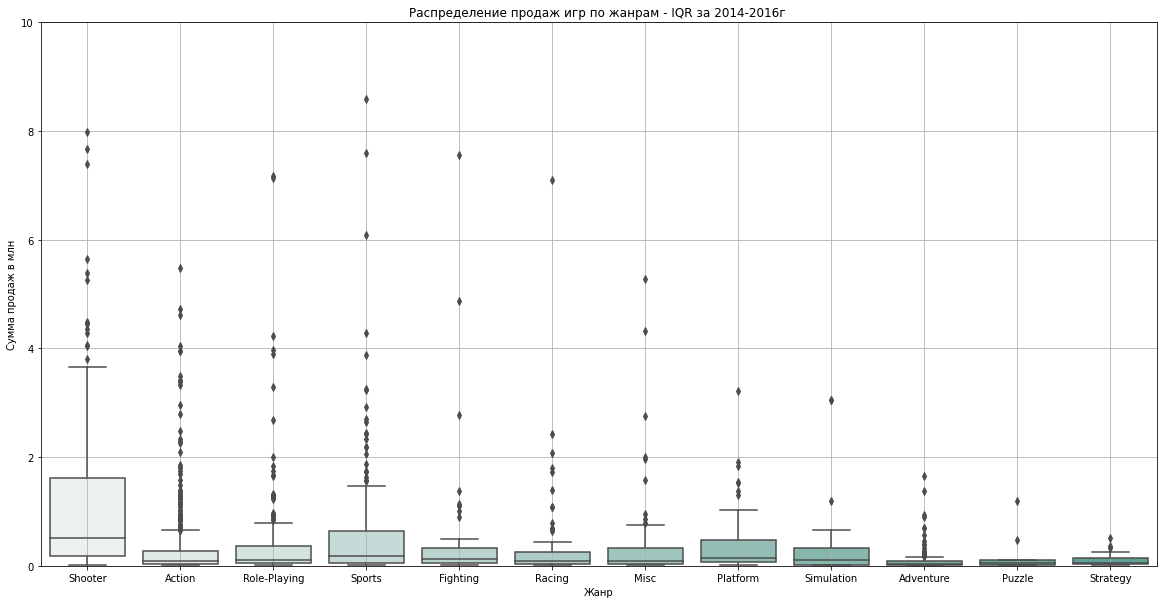

In [56]:
display(data_relevance.groupby('genre')['total_sales'].describe())
plt.figure(figsize=(20, 10))
plt.ylim(0, 10)
sns.boxplot(x='genre', y='total_sales', data=data_relevance, palette='light:#5A9')
plt.grid(True)
plt.title("Распределение продаж игр по жанрам - IQR за 2014-2016г ")
plt.xlabel("Жанр")
plt.ylabel("Сумма продаж в млн")
plt.show()


- Наиболее популярный жанр - Action - но по нему очень много выбросов в продажах, медиана и среднее ощутимо ниже чем у Shooter, Sports и Platform, это говорит о нестабильности, вероятно есть несколько очень прибыльных игр, и много не очень прибыльных
- Наиболее стабильно-прибыльный - Shooter, на втором месте Sports
- Самый не популярный и не прибыльный - Puzzle


#### Вывод
1. Больше всего игр было выпущено в 2008
2. Стабильный рост количества игр с 1993 г. пик- 2008, затем с 2012 ощутимый спад - связано с активным ростом игр в соц сетях и в формате мобильного приложения(данный период - период большого скачка в разработки мобильных игр). Для исследования возьмем период с 2010 - данные будут релевантны для прогнозирования на 2017 г.
3. Период актуальности платформы составляет в среднем 5-7 лет. Такой период и рассмотрим в исследовании, с учетом что в 2016г данные не полные, но необходимые - определим актульный период для исследования 2014-2016 гг
4. К дальнейшему исследованию сформированы данные:
  - период с 2014-2016г
  - 1686 строк
  - пропуски в critic_score - 57% 
  - user_score - 47% 
5. За период с 2014-2016гг по платформам показатель IQR разный, показатели среднего и медианы тоже значительно отличаются, наибольшие показатели у Wii, XOne, PS4, хорошие у X360,  WiiU и PS3; наименьшие - у PSP, PSV.
6. Активно растут по продажам: PS4, XOne
7. Падают по продажам: PS3, X360, 3DS, Wii, DS, PSP, WiiU
8. Стабильны: PC
9. Наиболее прибыльные платформы вероятно - PS4, XOne
10. Сравнили корреляцию на платформах XOne, PS4, PS3, X360, PC, 3DS. Зависимость между оценками пользователей и продажами не выявлена, в большинстве случаев корреляция отрицательная Зависимость между оценками критиков и продажами местами присутствует - корреляция почти 52% на платформе X360, на других платформах показатель ниже 44-17%. Опираться на отзывы пользователей и критиков для прогнозирования не рекомендуется.
11. Наиболее популярный жанр - Action - но по нему очень много выбросов в продажах, медиана и среднее ощутимо ниже чем у Shooter, Sports и Platform, это говорит о нестабильности, вероятно есть несколько очень прибыльных игр, и много не очень прибыльных
12. Наиболее стабильно-прибыльный - Shooter, на втором месте Sports
13. Самый не популярный и не прибыльный - Puzzle

### Формирование портрета пользователя каждого региона

#### Определим для пользователя каждого региона (NA, EU, JP) cамые популярные платформы (топ-5). 

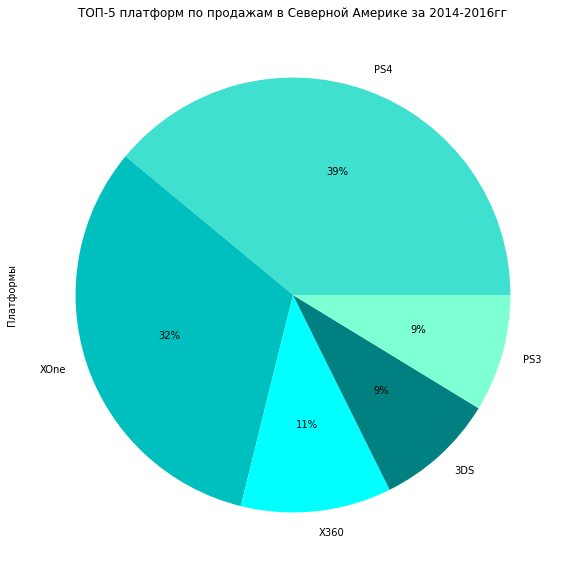

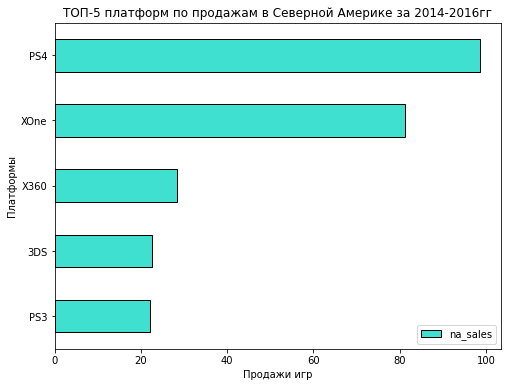

In [57]:
colors = ['turquoise', 'c', 'aqua', 'teal', 'aquamarine']
(data_relevance
  .pivot_table(index='platform', values='na_sales', aggfunc='sum')
  .sort_values(by='na_sales', ascending=False).head(5)
  .plot(kind='pie', y='na_sales', autopct='%1.0f%%', colors=colors, legend=False, figsize = (10,10) )
)
plt.title("ТОП-5 платформ по продажам в Северной Америке за 2014-2016гг")
plt.ylabel('Платформы')
plt.show
    
(data_relevance
  .pivot_table(index='platform', values='na_sales', aggfunc='sum')
  .sort_values(by='na_sales', ascending=True).tail(5)
  .plot.barh(edgecolor='black', color='turquoise', grid=False, figsize = (8,6))
)

plt.title("ТОП-5 платформ по продажам в Северной Америке за 2014-2016гг")
plt.ylabel('Платформы')
plt.xlabel('Продажи игр')
plt.show()

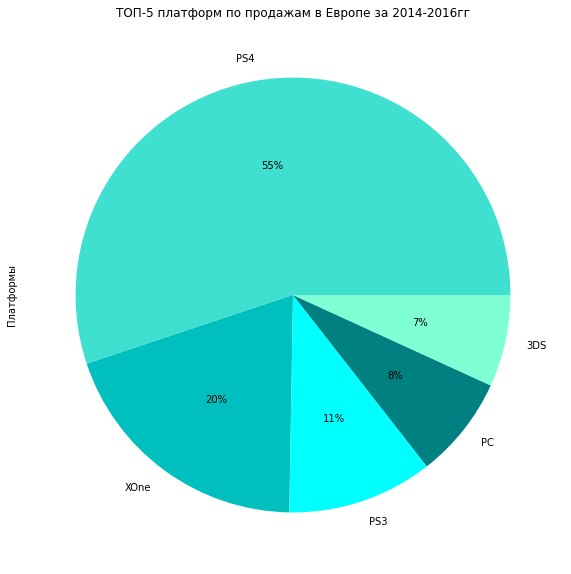

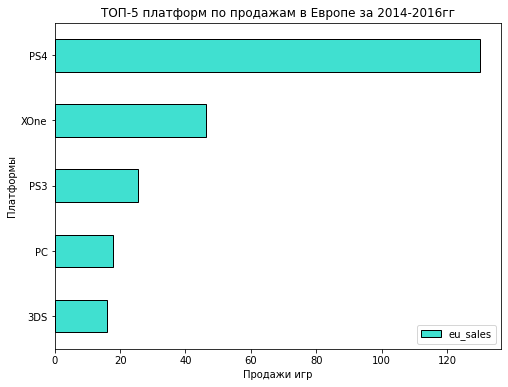

In [58]:
colors = ['turquoise', 'c', 'aqua', 'teal', 'aquamarine']
(data_relevance
  .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
  .sort_values(by='eu_sales', ascending=False).head(5)
  .plot(kind='pie', y='eu_sales', autopct='%1.0f%%', colors=colors, legend=False, figsize = (10,10) )
)
plt.title("ТОП-5 платформ по продажам в Европе за 2014-2016гг")
plt.ylabel('Платформы')
plt.show
    
(data_relevance
  .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
  .sort_values(by='eu_sales', ascending=True).tail(5)
  .plot.barh(edgecolor='black', color='turquoise', grid=False, figsize = (8,6))
)

plt.title("ТОП-5 платформ по продажам в Европе за 2014-2016гг")
plt.ylabel('Платформы')
plt.xlabel('Продажи игр')
plt.show()

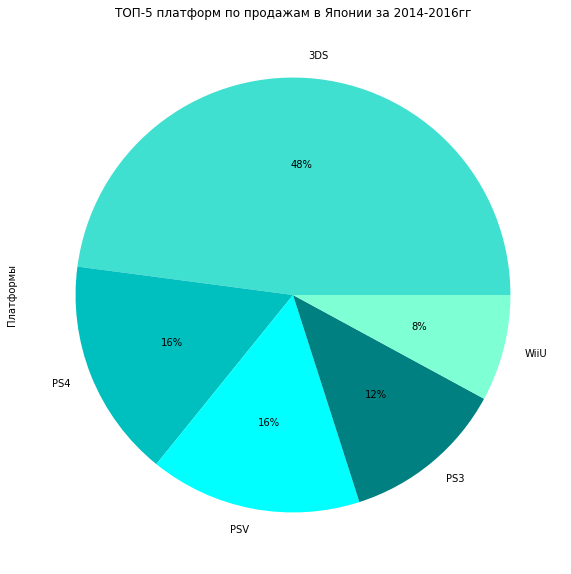

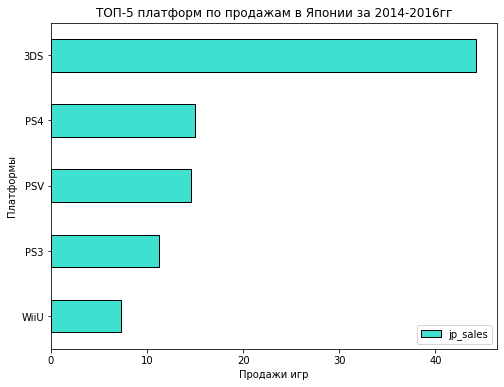

In [59]:
colors = ['turquoise', 'c', 'aqua', 'teal', 'aquamarine']
(data_relevance
  .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
  .sort_values(by='jp_sales', ascending=False).head(5)
  .plot(kind='pie', y='jp_sales', autopct='%1.0f%%', colors=colors, legend=False, figsize = (10,10) )
)
plt.title("ТОП-5 платформ по продажам в Японии за 2014-2016гг")
plt.ylabel('Платформы')
plt.show
    
(data_relevance
  .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
  .sort_values(by='jp_sales', ascending=True).tail(5)
  .plot.barh(edgecolor='black', color='turquoise', grid=False, figsize = (8,6))
)

plt.title("ТОП-5 платформ по продажам в Японии за 2014-2016гг")
plt.ylabel('Платформы')
plt.xlabel('Продажи игр')
plt.show()

1. В Северной Америке лидирует  -  PS4 (игровая приставка восьмого поколения, выпускаемая японской компанией Sony), на втором месте с небольшим отрывом - XOne
2. В Европе лидирует  - PS4 
3. В Японии абсолютный лидер - 3DS (портативная игровая система производства Nintendo)

#### Определим для пользователя каждого региона (NA, EU, JP) cамые популярные жанры (топ-5). 

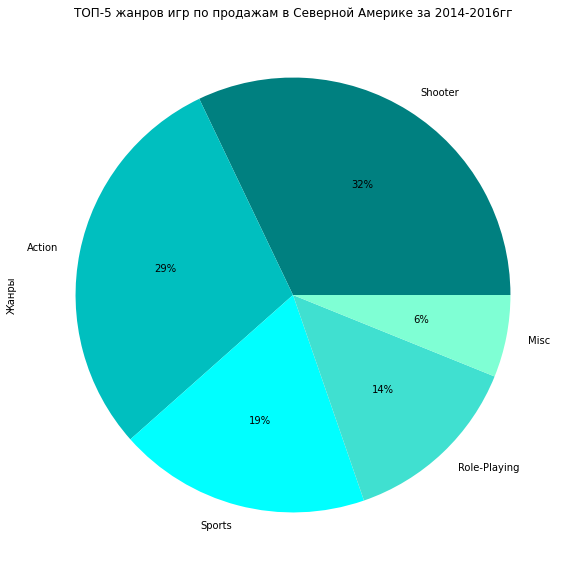

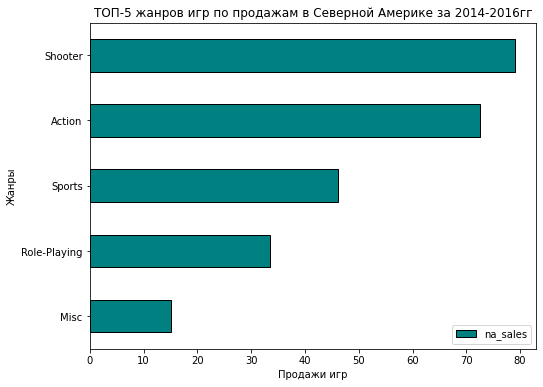

In [60]:
colors = ['teal', 'c', 'aqua','turquoise', 'aquamarine']
(data_relevance
  .pivot_table(index='genre', values='na_sales', aggfunc='sum')
  .sort_values(by='na_sales', ascending=False).head(5)
  .plot(kind='pie', y='na_sales', autopct='%1.0f%%', colors=colors, legend=False, figsize = (10,10) )
)
plt.title("ТОП-5 жанров игр по продажам в Северной Америке за 2014-2016гг")
plt.ylabel('Жанры')
plt.show
    
(data_relevance
  .pivot_table(index='genre', values='na_sales', aggfunc='sum')
  .sort_values(by='na_sales', ascending=True).tail(5)
  .plot.barh(edgecolor='black', color='teal', grid=False, figsize = (8,6))
)

plt.title("ТОП-5 жанров игр по продажам в Северной Америке за 2014-2016гг")
plt.ylabel('Жанры')
plt.xlabel('Продажи игр')
plt.show()

Text(0.5, 0, 'Продажи игр')

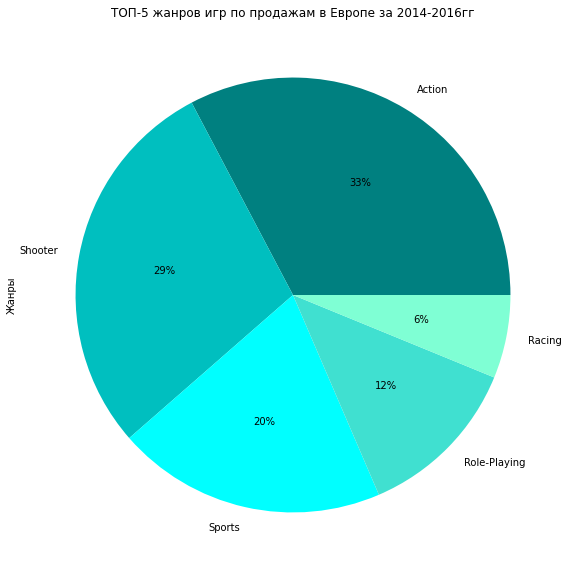

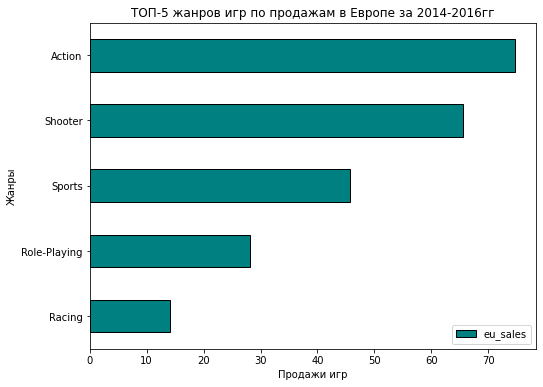

In [61]:
colors = ['teal', 'c', 'aqua','turquoise',  'aquamarine']
(data_relevance
  .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
  .sort_values(by='eu_sales', ascending=False).head(5)
  .plot(kind='pie', y='eu_sales', autopct='%1.0f%%', colors=colors, legend=False, figsize = (10,10) )
)
plt.title("ТОП-5 жанров игр по продажам в Европе за 2014-2016гг")
plt.ylabel('Жанры')
plt.show
    
(data_relevance
  .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
  .sort_values(by='eu_sales', ascending=True).tail(5)
  .plot.barh(edgecolor='black', color='teal', grid=False, figsize = (8,6))
)

plt.title("ТОП-5 жанров игр по продажам в Европе за 2014-2016гг")
plt.ylabel('Жанры')
plt.xlabel('Продажи игр')

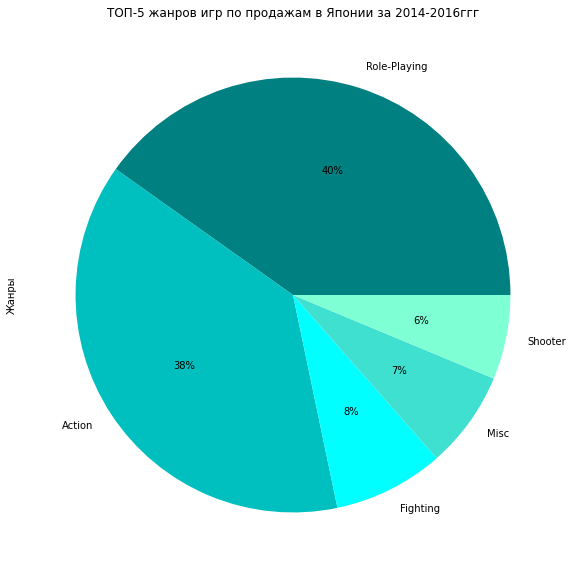

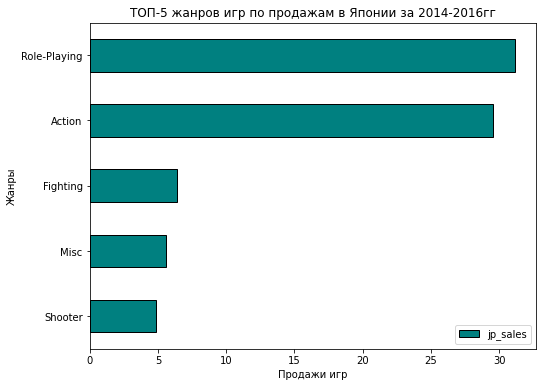

In [62]:
colors = ['teal', 'c', 'aqua','turquoise',   'aquamarine']
(data_relevance
  .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
  .sort_values(by='jp_sales', ascending=False).head(5)
  .plot(kind='pie', y='jp_sales', autopct='%1.0f%%', colors=colors, legend=False, figsize = (10,10) )
)
plt.title("ТОП-5 жанров игр по продажам в Японии за 2014-2016ггг")
plt.ylabel('Жанры')
plt.show
    
(data_relevance
  .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
  .sort_values(by='jp_sales', ascending=True).tail(5)
  .plot.barh(edgecolor='black', color='teal', grid=False, figsize = (8,6))
)

plt.title("ТОП-5 жанров игр по продажам в Японии за 2014-2016гг")
plt.ylabel('Жанры')
plt.xlabel('Продажи игр')
plt.show()

1. В Северной Америке и Европе самый популярный жанр - Action, на втором месте - Shooter
2. В Японии самый популярный жанр - Role-Playing, на втором месте - Action

#### Определим для пользователя каждого региона (NA, EU, JP) влияние рейтинга ESRB на продажи.

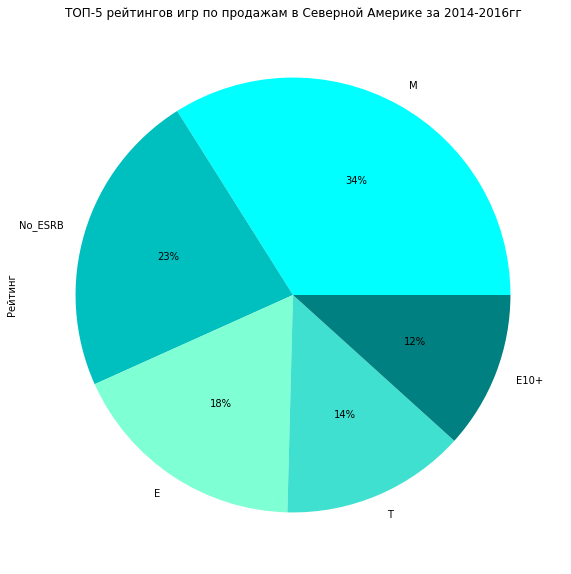

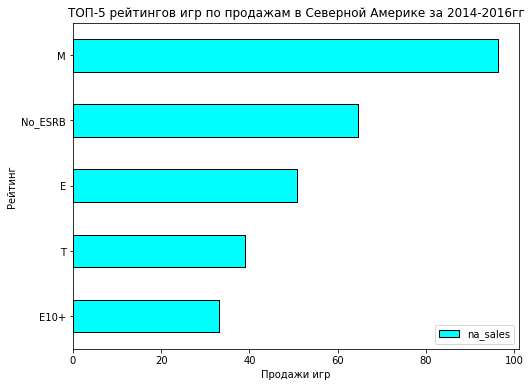

In [63]:
colors = [ 'aqua', 'c','aquamarine', 'turquoise', 'teal']
(data_relevance
  .pivot_table(index='rating', values='na_sales', aggfunc='sum')
  .sort_values(by='na_sales', ascending=False).head(5)
  .plot(kind='pie', y='na_sales', autopct='%1.0f%%', colors=colors, legend=False, figsize = (10,10) )
)
plt.title("ТОП-5 рейтингов игр по продажам в Северной Америке за 2014-2016гг")
plt.ylabel('Рейтинг')
plt.show
    
(data_relevance
  .pivot_table(index='rating', values='na_sales', aggfunc='sum')
  .sort_values(by='na_sales', ascending=True).tail(5)
  .plot.barh(edgecolor='black', color= 'aqua', grid=False, figsize = (8,6))
)

plt.title("ТОП-5 рейтингов игр по продажам в Северной Америке за 2014-2016гг")
plt.ylabel('Рейтинг')
plt.xlabel('Продажи игр')
plt.show()

Text(0.5, 0, 'Продажи игр')

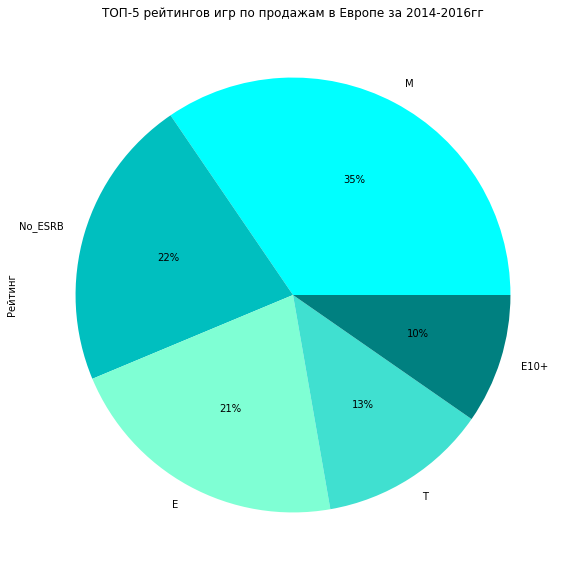

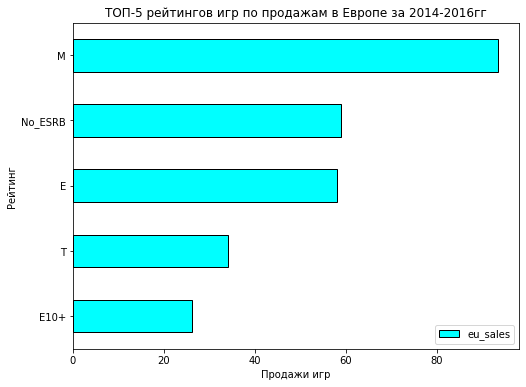

In [64]:
colors = [ 'aqua', 'c','aquamarine', 'turquoise', 'teal']
(data_relevance
  .pivot_table(index='rating', values='eu_sales', aggfunc='sum')
  .sort_values(by='eu_sales', ascending=False).head(5)
  .plot(kind='pie', y='eu_sales', autopct='%1.0f%%', colors=colors, legend=False, figsize = (10,10) )
)
plt.title("ТОП-5 рейтингов игр по продажам в Европе за 2014-2016гг")
plt.ylabel('Рейтинг')
plt.show
    
(data_relevance
  .pivot_table(index='rating', values='eu_sales', aggfunc='sum')
  .sort_values(by='eu_sales', ascending=True).tail(5)
  .plot.barh(edgecolor='black', color='aqua', grid=False, figsize = (8,6))
)

plt.title("ТОП-5 рейтингов игр по продажам в Европе за 2014-2016гг")
plt.ylabel('Рейтинг')
plt.xlabel('Продажи игр')

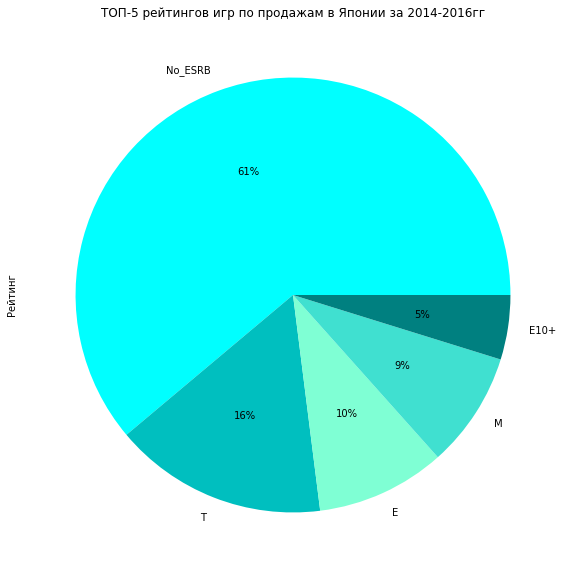

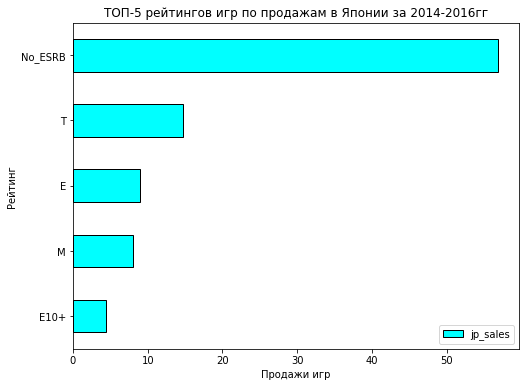

In [65]:
colors = ['aqua', 'c','aquamarine', 'turquoise', 'teal']
(data_relevance
  .pivot_table(index='rating', values='jp_sales', aggfunc='sum')
  .sort_values(by='jp_sales', ascending=False).head(5)
  .plot(kind='pie', y='jp_sales', autopct='%1.0f%%', colors=colors, legend=False, figsize = (10,10) )
)
plt.title("ТОП-5 рейтингов игр по продажам в Японии за 2014-2016гг")
plt.ylabel('Рейтинг')
plt.show
    
(data_relevance
  .pivot_table(index='rating', values='jp_sales', aggfunc='sum')
  .sort_values(by='jp_sales', ascending=True).tail(5)
  .plot.barh(edgecolor='black', color='aqua', grid=False, figsize = (8,6))
)

plt.title("ТОП-5 рейтингов игр по продажам в Японии за 2014-2016гг")
plt.ylabel('Рейтинг')
plt.xlabel('Продажи игр')
plt.show()

Самые популярные категории рейтинга:
1. В Северной Америке и Европе больше всего продаются игры с рейтингом «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. В целом распределения по Северной Америке и Европе практически одинаковы.
2. В Японии распределение сильно отличается - наиболее популярны игры без обозначения рейтинга ESRB. Т к рейтинг ESRB предназначен для маркировки игр для США и Канады, то логично его отсутствие для других регионов. На втором месте игры с рейтингом "T" «Подросткам»: Игра подходит для лиц от 13 лет.
3. Соответственно отсутствие рейтинга ESRB в графике Северной Америки выглядит странно - 23% большое значение, возможно ошибка в выгрузке данных или ошибочное заполнение - нужно будет уточнить у ответственных лиц

<function matplotlib.pyplot.show(close=None, block=None)>

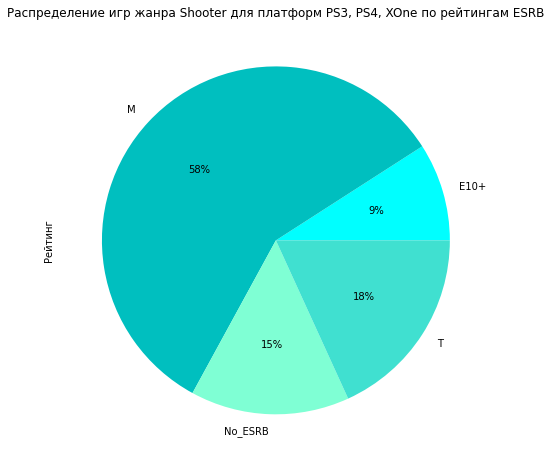

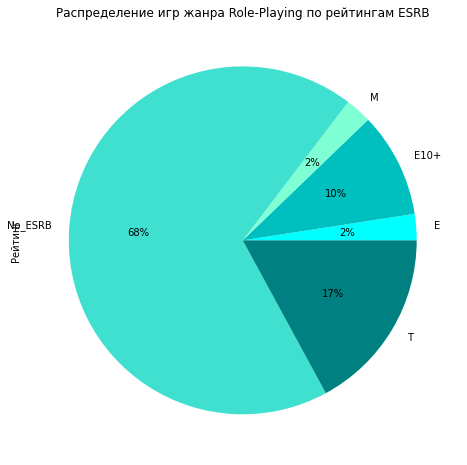

In [66]:
data_action = data_relevance.query('platform in ["PS3","PS4","XOne"] and genre == "Shooter"')
colors = ['aqua', 'c','aquamarine', 'turquoise', 'teal']
data_action.groupby(['rating']).count().plot(
    kind='pie', y='name', autopct='%1.0f%%', colors=colors, legend=False, figsize = (8,8))
plt.title("Распределение игр жанра Shooter для платформ PS3, PS4, XOne по рейтингам ESRB")
plt.ylabel('Рейтинг')
plt.show

data_rpg = data_relevance.query('genre == "Role-Playing" and platform =="3DS"' )
colors = ['aqua', 'c','aquamarine', 'turquoise', 'teal']
data_rpg.groupby(['rating']).count().plot(
    kind='pie', y='name', autopct='%1.0f%%', colors=colors, legend=False, figsize = (8,8))
plt.title("Распределение игр жанра Role-Playing по рейтингам ESRB")
plt.ylabel('Рейтинг')
plt.show

#### Вывод

1. В Северной Америке больше всего продаются игры в жанре Action для платформы PS4 и Xbox One с рейтингом «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. 
2. В Европе больше всего продаются игры в жанре Action для платформ PS3, PS4 с рейтингом «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет.
3. В Японии больше всего продаются игры в жанре Role-Playing для платформы 3DS с рейтингом «E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов.

4. В данных рейтинга больше всего пропусков - почти 44% для периода 2010-2015гг, а значит выводы могут быть скорректированы при востановлении пропущенных значений.
5. Для Европы и Северной Америки по распределению игр жанра Shooter для платформ PS3, PS4, XOne по рейтингам ESRB лидирует рейтинг «M». 


### Проверка гипотез

#### Гипотеза №1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Мы имеем две генеральные совокупности, следовательно применяем метод для гипотезы о равенстве средних двух генеральных совокупностей: st.ttest_ind

1. Нулевая гипотеза (H0) - средние пользовательские рейтинги платформ Xbox One и PC равны
2. Альтернативная гипотеза (H1) - средние пользовательские рейтинги платформ Xbox One и PC не равны

Установим уровень статистической значимости (alpha) равное 0.01. В данном случае это значение даст нам высокую вероятность верного вывода

Сначала необходимо подготовить данные для применения метода: удалить пропуски и сформировать срезы

In [67]:
data_relevance.dropna(subset=['user_score'], inplace=True)
data_relevance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 1 to 1680
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             888 non-null    object 
 1   platform         888 non-null    object 
 2   year_of_release  888 non-null    int64  
 3   genre            888 non-null    object 
 4   na_sales         888 non-null    float64
 5   eu_sales         888 non-null    float64
 6   jp_sales         888 non-null    float64
 7   other_sales      888 non-null    float64
 8   critic_score     704 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           888 non-null    object 
 11  total_sales      888 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 90.2+ KB


In [68]:
data_xone = data_relevance.query('platform == "XOne"')
data_pc = data_relevance.query('platform == "PC"')

Данные готовы. Проверим гипотезу с помощью метода st.ttest_ind

In [69]:
alpha = 0.01
results = st.ttest_ind(data_xone['user_score'], data_pc['user_score'], equal_var=False) 

print(f'p-значение: {results.pvalue}')

if results.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Значение p-value показывает: вероятность случайно получить такое или большее различие равна 98%, хотя оценки пользователей представлены по двум разным платформам. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними пользовательскими рейтингами платформ Xbox One и PC.

Сравним средние значения:

In [70]:
print(data_xone['user_score'].mean())
print(data_pc['user_score'].mean())

6.594545454545456
6.298360655737705


Вывод: не получилось отвергнуть нулевую гипотезу - средние пользовательские рейтинги платформ Xbox One и PC практически равны

#### Гипотеза №2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Мы имеем две генеральные совокупности, следовательно применяем метод для гипотезы о равенстве средних двух генеральных совокупностей: st.ttest_ind

1. Нулевая гипотеза (H0) - средние пользовательские рейтинги жанров Action и Sports равны
2. Альтернативная гипотеза (H1) - средние пользовательские рейтинги жанров Action и Sports не равны

Установим уровень статистической значимости (alpha) равное 0.01. В данном случае это значение даст нам высокую вероятность верного вывода

Подготовим данные для проверки гипотезы:  сформируем срезы

In [71]:
data_action = data_relevance.query('genre == "Action"')
data_sports = data_relevance.query('genre == "Sports"')

In [72]:
alpha = 0.01
results = st.ttest_ind(data_action['user_score'], data_sports['user_score'], equal_var=False) 

print(f'p-значение: {results.pvalue}')

if results.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


In [73]:
print(data_action['user_score'].mean())
print(data_sports['user_score'].mean())

6.760606060606061
5.2251968503937


Вывод: отвергаем нулевую гипотезу - средние пользовательские рейтинги жанров Action и Sports не равны

### Итоговый Вывод

1. Всего в датафрейме было изначально 16715 строк.
2. В данном исследовании на этапе предообработки были внесены следущие изменения:
- Все наименования столбцов - с нарушениями хорошего стиля, привели к нижнему регистру.
- Был обнаружен некорректный тип данных:
  * Year_of_Release - float64 - нужно заменили на int (т к у нас только год релиза, тип int)
  * User_Score - object - нужно заменли на float64
- Пропуски присутствовали в столбцах:
  * Name - менее 1% пропущеных значений
  * Year_of_Release - 1.6% попущеных значений
  * Genre - менее 1% пропущеных значений
  * Critic_Score - 51.3% пропущеных значений
  * User_Score - 54.6% пропущеных значений
  * Rating - 40% пропущеных значений
- В датафрейме удалили 4 строки (менее 1% данных) - пропуски в столбцах 'name' 'genre' и данные с 0 значениями выручки и пропусками в колонках с рейтингами.
- Пропуски в колонке 'year_of_release' часть востановили по существующим данным, 160 пропусков заполнили "0".
- В колонках 'user_score', 'critic_score','rating' пропуски не удаляли и не заполняли т к это не корректно повлияло бы на исследование.
- Было обнаружено значение tbd в 2424 колонках - заменили на NaN.(от англ. To Be Determined (будет определено) или To Be Decided (будет решено))
- Удален один явный дубликат
3. Аномалии, неявные дубликаты не были обнаружены.
4. Добавили колонку с общей суммой выручки по всем регионам
5. Всего для исследования подготовили 16711 строк.
6. Больше всего игр было выпущено в 2008
7. Стабильный рост количества игр с 1993 г. пик- 2008, затем с 2012 ощутимый спад - связано с активным ростом игр в соц сетях и в формате мобильного приложения(данный период - период большого скачка в разработки мобильных игр). Для исследования возьмем период с 2010 - данные будут релевантны для прогнозирования на 2017 г.
8. Период актуальности платформы составляет в среднем 5-7 лет.  Релевантные данные для прогноза 2-3 года. С учетом что в 2016г данные не полные - определим актульный период для исследования 2013-2015 гг
9. К дальнейшему исследованию сформированы данные:
  - период с 2013-2015г
  - 1686 строки
  - пропуски в critic_score - 57%
  - user_score - 47%
10. За период с 2013-2015гг по платформам показатель IQR разный, показатели среднего и медианы тоже значительно отличаются, наибольшие показатели у XOne, PS4,  Wii, хорошие у X360, WiiU и PS3; наименьшие - у PSP, PSV.
11. Активно растут по продажам: PS4, XOne
12. Падают по продажам: PS3, X360, Wii, DS, PSP, WiiU
13. Стабильны: PC
14. Наиболее прибыльные платформы вероятно - PS4, XOne, 3DS
15. Сравнили корреляцию на платформах XOne, PS4, PS3, X360, PC, 3DS. Зависимость между оценками пользователей и продажами не выявлена, в большинстве случаев корреляция отрицательная Зависимость между оценками критиков и продажами местами присутствует - корреляция почти 46% на платформе XOne, на других платформах показатель ниже 22-33%. Опираться на отзывы пользователей и критиков для прогнозирования не рекомендуется.
16. Наиболее популярный жанр - Action - но по нему очень много выбросов в продажах, медиана и среднее ощутимо ниже чем у Shooter, Sports и Platform, это говорит о нестабильности, вероятно есть несколько очень прибыльных игр, и много не очень прибыльных
17. Наиболее стабильно-прибыльный жанр - Shooter, на втором месте Sports
18. Самый не популярный и не прибыльный жанр - Puzzle
19. В Северной Америке и Европе больше всего продаются игры с рейтингом «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. В целом распределения по Северной Америке и Европе практически одинаковы.
20. В Японии распределение сильно отличается - наиболее популярны игры без обозначения рейтинга ESRB. Т к рейтинг ESRB предназначен для маркировки игр для США и Канады, то логично его отсутствие для других регионов. На втором месте игры с рейтингом "T" «Подросткам»: Игра подходит для лиц от 13 лет.
21. Соответственно отсутствие рейтинга ESRB в графике Северной Америки выглядит странно - 21% большое значение, возможно ошибка в выгрузке данных или ошибочное заполнение - нужно будет уточнить у ответственных лиц
22. В данных рейтинга больше всего пропусков - почти 44% для периода 2010-2015гг, а значит выводы могут быть скорректированы при востановлении пропущенных значений.
23. Для Европы и Северной Америки по распределению игр жанра Shooter для платформ PS3, PS4, XOne по рейтингам ESRB лидирует рейтинг «M». 
25. Проверили гипотезы, получили выводы:
- средние пользовательские рейтинги платформ Xbox One и PC практически равны
- средние пользовательские рейтинги жанров Action и Sports не равны
26. **Потенциально прибыльными продуктами можно считать:**
- **для Северной Америки игры в жанре Shooter для платформ PS4, XOne с рейтингом «M»**
- **для Европы игры в жанре Shooter, для платформ PS4 с рейтингом «M»**
- **для Японии игры Role-Playing для платформы 3DS, рейтинг не учитывать**